In [17]:
!pip install cartopy
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import plotly.express as px

In [18]:
### ------------------------------------------------------------------------------------------------Meterorite Landings----------------------------------------------------------------------------------

if __name__ == "__main__":

    df = pd.read_csv('/content/Meteorite_Landings.csv')
    df = df.dropna(subset=['reclong', 'reclat'])

    fig, ax = plt.subplots(figsize=(100, 100), subplot_kw={'projection': ccrs.Mercator()})

    # Add features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    ax.scatter(df['reclong'], df['reclat'],color='red', transform=ccrs.PlateCarree())
    # Set the extent of the map if needed
    ax.set_extent([-180, 180, -90, 90])

    plt.show()


<ipython-input-19-4cba36738957>:21: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



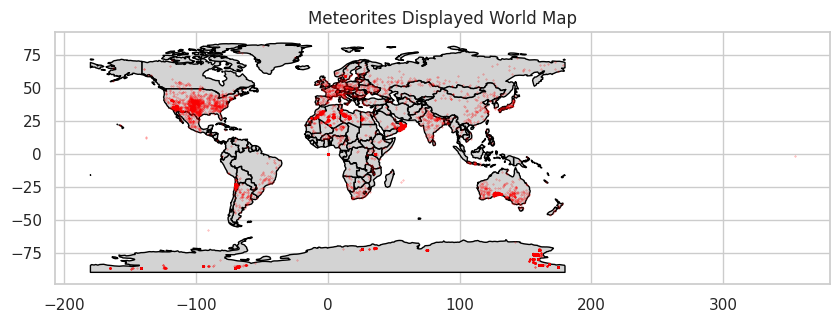

           mass (g)
count  4.558500e+04
mean   1.327808e+04
std    5.749889e+05
min    0.000000e+00
25%    7.200000e+00
50%    3.260000e+01
75%    2.026000e+02
max    6.000000e+07


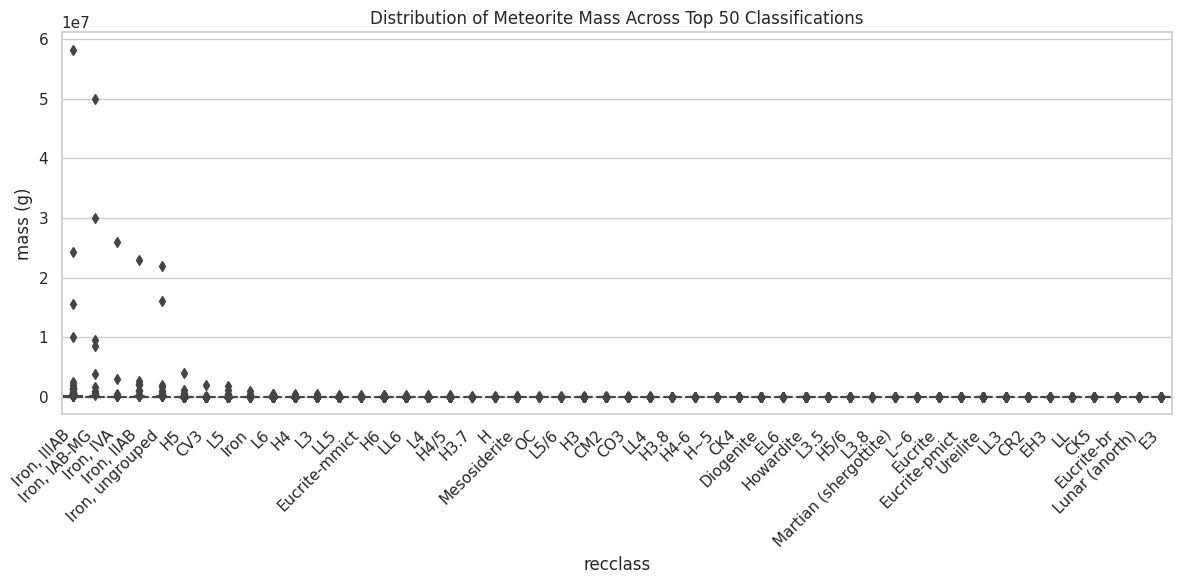

In [19]:
### -----------------------------------------------------------------------------------------Mass Variation----------------------------------------------------------------------------------


import pandas as pd

df = pd.read_csv('/content/Meteorite_Landings.csv')

import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt


long_lat = df[['reclat', 'reclong']]
long_lat = pd.DataFrame(long_lat)
long_lat

geometry = [Point(long, lat) for long, lat in zip(long_lat['reclong'], long_lat['reclat'])]
geo_df = gpd.GeoDataFrame(long_lat, geometry=geometry, crs="EPSG:4326")

# Plot the GeoDataFrame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(10, 6), color='lightgray', edgecolor='black')
geo_df.plot(ax=ax, marker='o', color='red', markersize=0.1, alpha=0.5)

plt.title('Meteorites Displayed World Map')
plt.show()


# How does the mass of meteorites vary across different classifications?
import seaborn as sns

masses = df[['mass (g)']]
classes = df[['recclass']]
mass_class = pd.concat([masses, classes], axis=1)
mass_class = mass_class.dropna()
mass_class = mass_class.sort_values(by='mass (g)', ascending=False)

mass_class['recclass'].nunique()


# Descriptive statistics
print(mass_class.describe())

top_50_classes = mass_class['recclass'].value_counts().nlargest(50).index
mass_class_subset = mass_class[mass_class['recclass'].isin(top_50_classes)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='recclass', y='mass (g)', data=mass_class_subset)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Meteorite Mass Across Top 50 Classifications')
plt.tight_layout()
plt.show()




In [20]:
### ---------------------------------------------------------------------------------------------------Meterorite classes----------------------------------------------------------------------------------
### Reclass most common and least common - World Map

df = pd.read_csv("/content/Meteorite_Landings.csv")

# Calculate the count of occurrences for each recclass of meteorite
meteorite_class_counts = df['recclass'].value_counts()
print(meteorite_class_counts)

# Most common and least common recclass - L6 is most common class while there are many least common classes
most_common_class = meteorite_class_counts.idxmax() #L6
least_common_classes = meteorite_class_counts[meteorite_class_counts == meteorite_class_counts.min()].index.tolist()

# Create a new column to label meteorites as 'Most Common Class', 'Least Common Class', or 'Other'
df['Class Label'] = df['recclass'].apply(lambda x: 'Most Common Class' if x == most_common_class
                                          else ('Least Common Class' if x in least_common_classes else 'Other'))

# Include only the most common and least common classes
df_filtered = df[df['Class Label'] != 'Other']

# Create the scatter mapbox plot
world_map = px.scatter_mapbox(df_filtered, lat='reclat', lon='reclong',
                            hover_name='name', color='Class Label',
                            hover_data=['mass (g)', 'year', 'recclass'],
                            category_orders={"Class Label": ["Most Common Class", "Least Common Class"]},
                            color_discrete_map={"Most Common Class": "lightgreen", "Least Common Class": "red"},
                            zoom=1, height=300)

# Customize the layout of the map to include a transparent background
world_map.update_layout(
    mapbox_style='open-street-map',
    mapbox=dict(center=dict(lat=0, lon=0), zoom=1),
    margin=dict(l=0, r=0, t=0, b=0),
    mapbox_layers=[{
        "below": 'traces',
        "sourcetype": "raster",
        "sourceattribution": "OpenStreetMap",
        "source": [
            "https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}"
        ],
        "opacity": 1
    }]
)

# Most common class and least common classes on World map
world_map.show()


L6         8285
H5         7142
L5         4796
H6         4528
H4         4211
           ... 
EL7           1
CH/CBb        1
H/L~4         1
LL3.7-6       1
L/LL          1
Name: recclass, Length: 466, dtype: int64


In [21]:
### Reclass most common and least common - Bar Graph

import pandas as pd
import plotly.express as px

top_classes = df['recclass'].value_counts().nlargest(20)

# Convert the Series to a DataFrame and rename the columns
top_classes_df = top_classes.reset_index()
top_classes_df.columns = ['recclass', 'Count']

# Create a bar plot using plotly, with the selected classes
Bargraph_classes = px.bar(top_classes_df, x='recclass', y='Count',
                     title="<b>Top 15 Meteorite Classes by Count</b>",
                     text='Count', height=500)

# Updating the layout of the plot
Bargraph_classes.update_layout(
    plot_bgcolor="rgba(0,0,0,0)",
    xaxis=dict(showgrid=True, title="Meteorite Classes"),
    yaxis=dict(showgrid=True, title="Counts"),
    showlegend=False,
)

# Color the bars based on the (count > 4000) of the meteorite classes
Bargraph_classes.update_traces(marker_color=['#4CAF50' if y > 4000 else '#6DFC73' for y in top_classes_df['Count']])

# Bar Graph figure
Bargraph_classes.show()


In [22]:
### Reclass Average mass of Meteorite

import pandas as pd
import plotly.express as px

# Handling NaN mass values
df_cleaned = df.dropna(subset=['mass (g)'])

# Grouping meteorite data by recclass and finding the average mass for each meteorite class
class_mass_means = df_cleaned.groupby('recclass')['mass (g)'].mean().reset_index()

# Highest average mass class dataframe
max_mass_class = class_mass_means.loc[class_mass_means['mass (g)'].idxmax()]
df_max_mass_class = df_cleaned[df_cleaned['recclass'] == max_mass_class['recclass']]

# Bar chart of average mass of the top 20 recclasses
top_masses = class_mass_means.nlargest(20, 'mass (g)')
Bar_graph_mass = px.bar(top_masses, x='recclass', y='mass (g)',
                  title="<b>Top 20 Meteorite Classes by Average Mass</b>", height=500)

# Customize the layout and the color of the bars
Bar_graph_mass.update_layout(plot_bgcolor="rgba(0,0,0,0)", xaxis_showgrid=False, yaxis_title="Average Mass (g)")
Bar_graph_mass.update_traces(marker_color=px.colors.sequential.Viridis_r)

# Show the plots
Bar_graph_mass.show()




<ipython-input-23-8f02d5a3bc87>:17: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



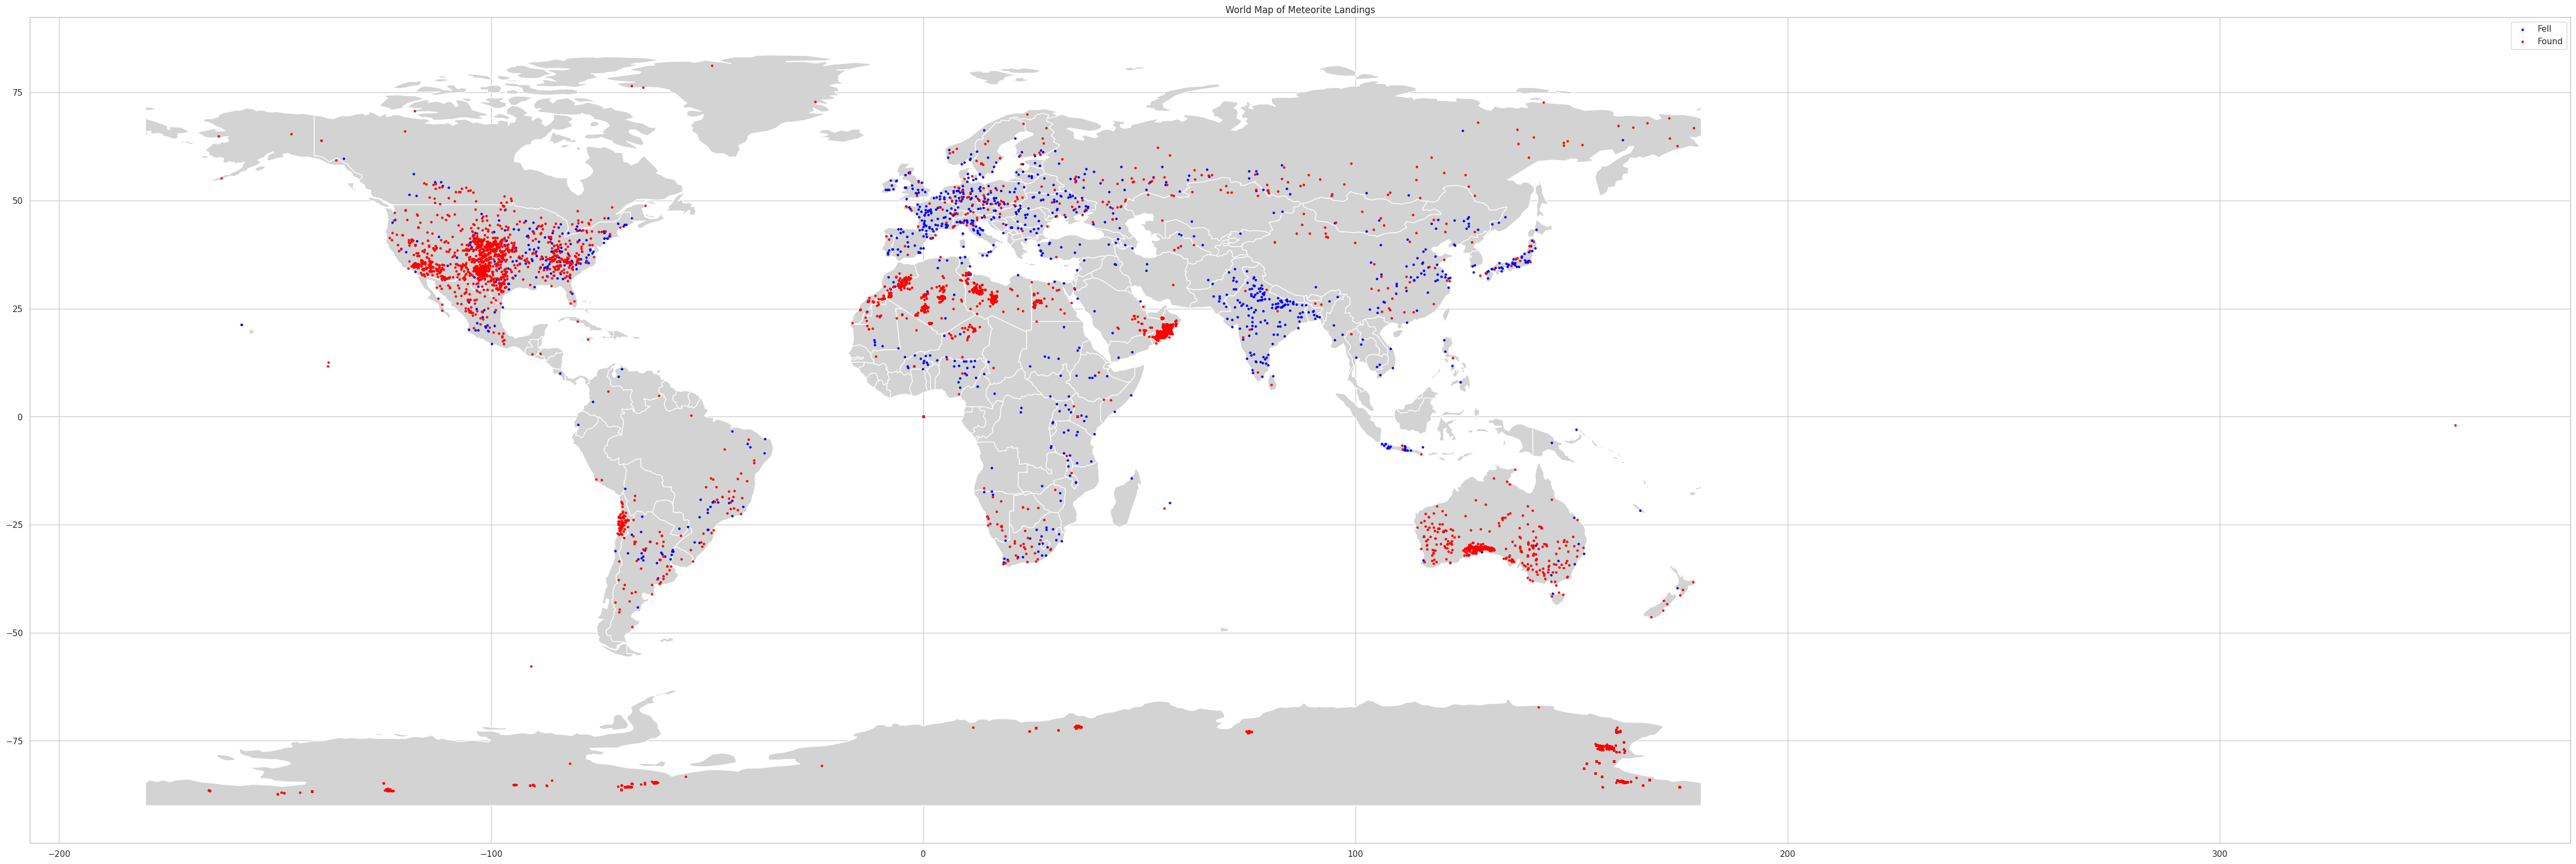

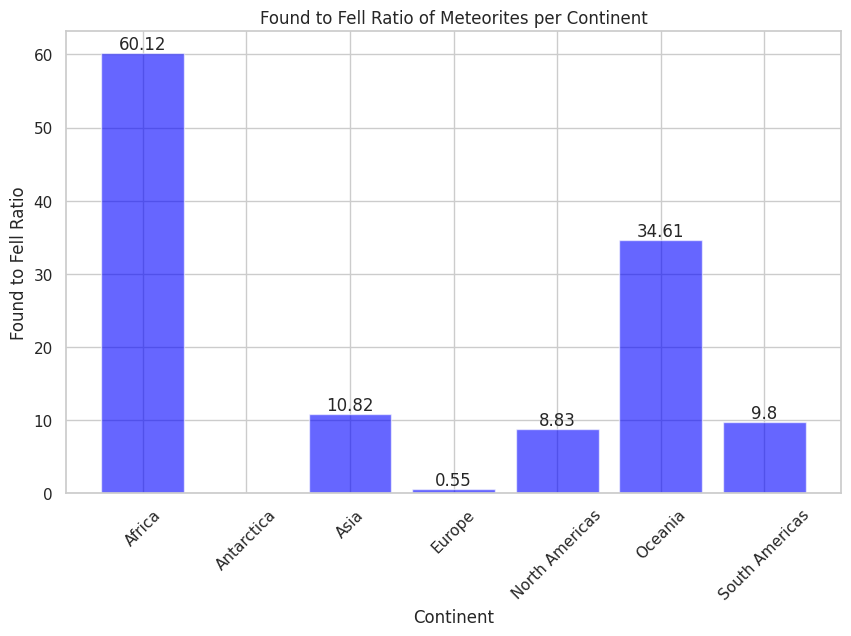

In [23]:
### -----------------------------------------------------------------------------------------------Continent Fell to Found----------------------------------------------------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

file_path = '/content/get_continent.csv'
meteorites_df = pd.read_csv(file_path)

meteorites_df.dropna(subset=['reclat', 'reclong'], inplace=True)

geometry = [Point(xy) for xy in zip(meteorites_df['reclong'], meteorites_df['reclat'])]
geo_meteorites_df = gpd.GeoDataFrame(meteorites_df, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(60, 50))

world.plot(ax=ax, color='lightgrey')

fell = geo_meteorites_df[geo_meteorites_df['fall'] == 'Fell']
found = geo_meteorites_df[geo_meteorites_df['fall'] == 'Found']

fell.plot(ax=ax, color='blue', markersize=5, label='Fell')
found.plot(ax=ax, color='red', markersize=5, label='Found')

ax.legend()
ax.set_title('World Map of Meteorite Landings')

plt.show()

files = pd.read_csv('/content/get_continent.csv')
sample_data = {
    'Name': files['recclass'],
    'Mass (g)': files['mass (g)'],
    'Fall': files['fall'],
    'Year': files['year'],
    'Latitude': files['reclat'],
    'Longitude': files['reclong'],
    'Continent': files['Continent']
}

meteorites_df = pd.DataFrame(sample_data)

fell_found_counts = meteorites_df.groupby(['Continent', 'Fall']).size().unstack(fill_value=0)
fell_found_ratio = fell_found_counts['Found']/fell_found_counts['Fell']
fell_found_ratio = fell_found_ratio.fillna(0)

plt.figure(figsize=(10, 6))
bars = plt.bar(fell_found_ratio.index, fell_found_ratio.values, color='blue', alpha=0.6)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Continent')
plt.ylabel('Found to Fell Ratio')
plt.title('Found to Fell Ratio of Meteorites per Continent')
plt.xticks(rotation=45)

plt.show()

<ipython-input-24-510560afbe0a>:59: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



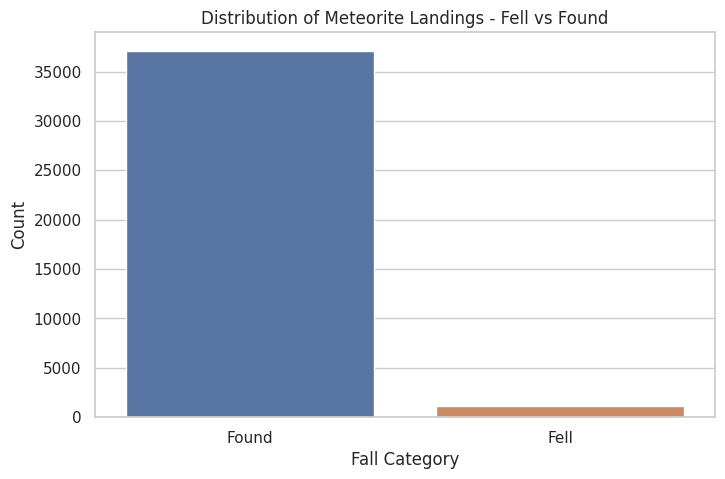

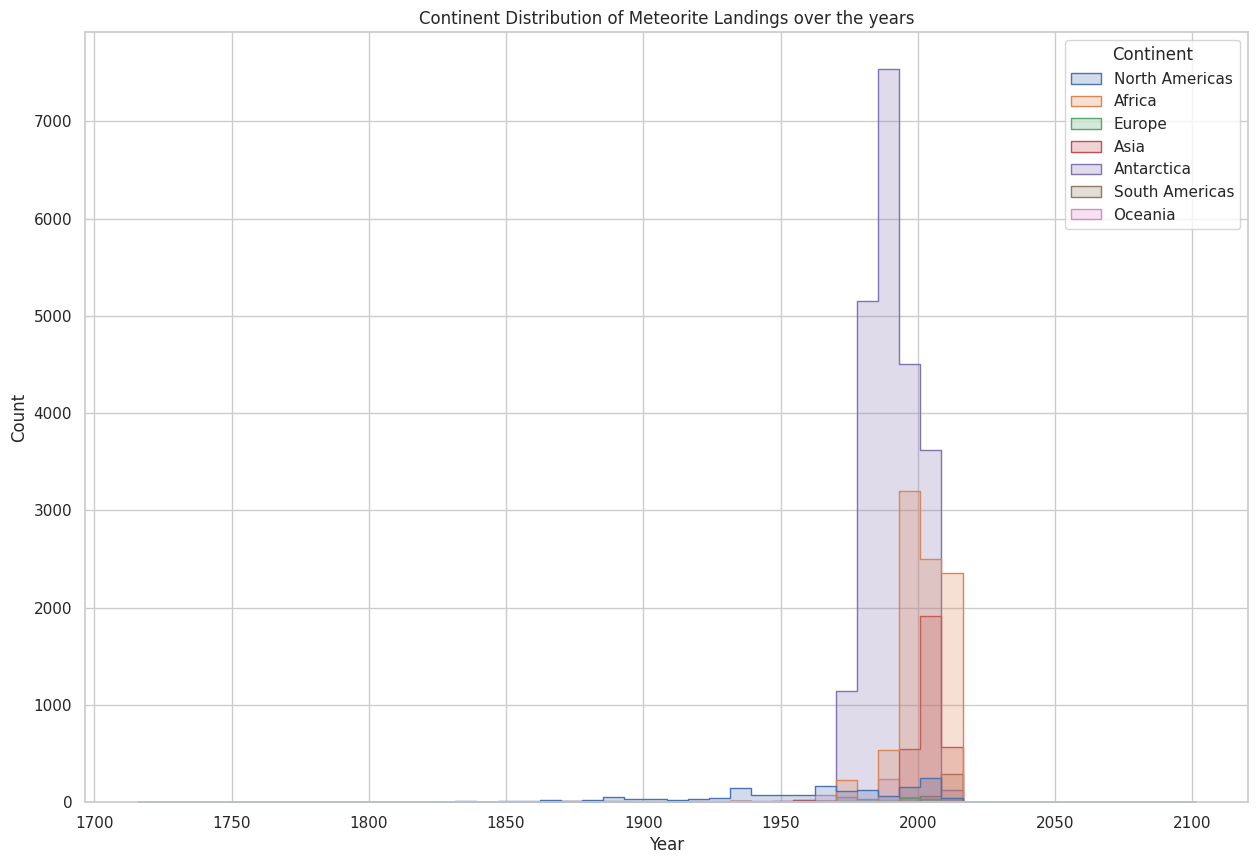

<ipython-input-24-510560afbe0a>:84: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



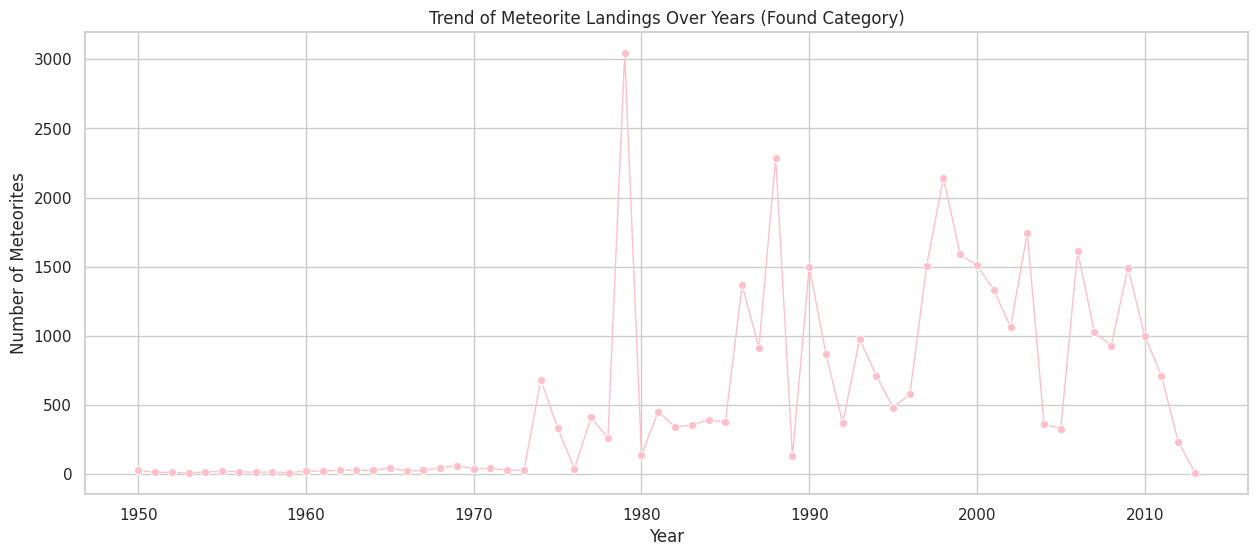

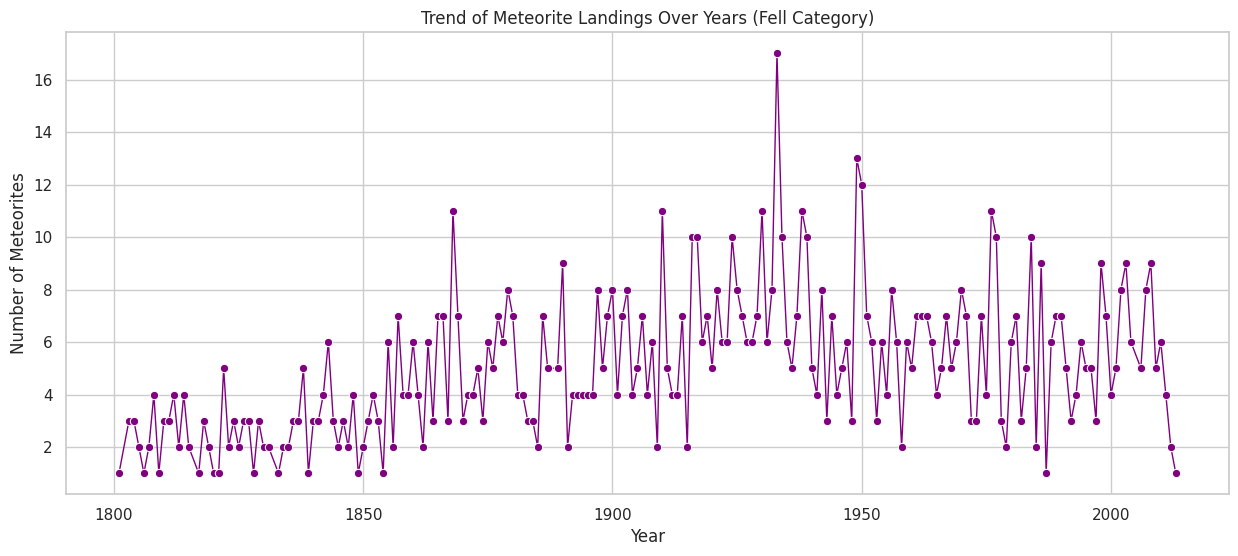

In [24]:
### -----------------------------------------------------------------------------------------------FRelationship between Year and Fall----------------------------------------------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt

file_path = '/content/Meteorite_Landings.csv'
meteorite_data = pd.read_csv(file_path)
# Display the first few rows of the dataset to understand its structure
meteorite_data.head()
    # Checking for missing values in 'fall' and 'year' columns
missing_values = meteorite_data[['fall', 'year','GeoLocation']].isnull().sum()

def get_continent(location):
    temp=location.split(',')
    lati=temp[0][1:]
    longi=temp[1][:-1]
    latitude=float(lati)
    longitude=float(longi)
    if 7 <= latitude <= 71.59 and -168.05 <= longitude <= -55.39:
        return 'North Americas'
    elif -90 <= latitude <= -63.28 and -180 <= longitude <= 180:
        return 'Antarctica'
    elif 36 <= latitude <= 71.08 and -9.31 <= longitude <= 66.1:
        return 'Europe'
    elif -34.51 <= latitude <= 37.21 and -17.34 <= longitude <= 51.24:
        return 'Africa'
    elif -53.54 <= latitude <= 12.28 and -81.2 <= longitude <= -34.46:
        return 'South Americas'
    elif -39.08 <= latitude <= 10.54 and 113.09 <= longitude <= 153.39:
        return 'Oceania'
    elif 1.16 <= latitude <= 71.43:
        if 26.1 <= longitude <= 180 or -180 <= longitude <= -169.45:
            return 'Asia'
        else:
            return 'NA'

# Converting 'year' to integer (if no missing values are present)
if missing_values['year'] == 0:
    meteorite_data['year'] = meteorite_data['year'].astype(int)
if missing_values['GeoLocation'] == 0:
    meteorite_data['GeoLocation'] = meteorite_data['GeoLocation'].astype(int)

# Checking unique values in 'fall' column
unique_fall_values = meteorite_data['fall'].unique()

missing_values
unique_fall_values
    # Removing records with missing values in the 'year' column
meteorite_data_cleaned = meteorite_data.dropna(subset=['year','GeoLocation'])

# Confirming the removal of missing values
remaining_missing_values = meteorite_data_cleaned[['fall', 'year','GeoLocation']].isnull().sum()
remaining_missing_values, meteorite_data_cleaned.shape

meteorite_data_cleaned['Continent'] = meteorite_data_cleaned.apply(lambda row: get_continent(row['GeoLocation']), axis=1)

meteorite_data_cleaned.to_csv('get_continent.csv', index=False)

sns.set(style="whitegrid")

# 1. Distribution of 'Fall' Categories
fall_counts = meteorite_data_cleaned['fall'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=fall_counts.index, y=fall_counts.values)
plt.title('Distribution of Meteorite Landings - Fell vs Found')
plt.xlabel('Fall Category')
plt.ylabel('Count')
plt.show()

# 2. Yearly Trends
plt.figure(figsize=(15, 10))
fell_data = meteorite_data_cleaned[meteorite_data_cleaned['year'] > 1700]
fell_data1=fell_data[fell_data['fall'] == 'Found']
sns.histplot(data=fell_data1, x='year', hue='Continent', element='step', bins=50)
plt.title('Continent Distribution of Meteorite Landings over the years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

meteorite_data_cleaned['decade'] = (meteorite_data_cleaned['year'] // 10) * 10

    # Create a contingency table
contingency_table = pd.crosstab(meteorite_data_cleaned['decade'], meteorite_data_cleaned['fall'])



fell_data = meteorite_data_cleaned[meteorite_data_cleaned['fall'] == 'Found']
fell_data1=fell_data[fell_data['year']>=1950]
# Grouping by year for 'Fell' category
fell_data2=fell_data1[fell_data1['year']<=2020]
fell_line_chart_data = fell_data2.groupby('year').size()

# Plotting the line chart for the 'Fell' category
plt.figure(figsize=(15, 6))
sns.lineplot(data=fell_line_chart_data, color="pink", linewidth=1,marker='o')
plt.title('Trend of Meteorite Landings Over Years (Found Category)')
plt.xlabel('Year')
plt.ylabel('Number of Meteorites')
plt.show()

fell_data = meteorite_data_cleaned[meteorite_data_cleaned['fall'] == 'Fell']
fell_data1=fell_data[fell_data['year']>=1800]
# Grouping by year for 'Fell' category
fell_data2=fell_data[fell_data['year']<=2020]
fell_line_chart_data = fell_data1.groupby('year').size()

# Plotting the line chart for the 'Fell' category
plt.figure(figsize=(15, 6))
sns.lineplot(data=fell_line_chart_data, color="purple", linewidth=1,marker='o')
plt.title('Trend of Meteorite Landings Over Years (Fell Category)')
plt.xlabel('Year')
plt.ylabel('Number of Meteorites')
plt.show()


